In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
class AMM:
    def __init__(self, x=100_000, y=100_000, comission=0.0):
        self.x = x
        self.y = y
        self.c_0 = x*y
        self.comission = comission
    
    def get_c(self):
        return self.x * self.y

    def get_trade_offer(self, asset_type: str, order: float):
        '''
        Takes in:
            asset_type: 0 for x, 1 for y.
            order: What the person wants to get. Positive means the person wants to buy, negative the person wants to sell.
        returns:
            What the trader will need to pay or get payed. If negative value, the trader needs to pay the given amount, if positive the trader gets payed this amount.
        '''
        assert (asset_type=='x' or asset_type=='y')

        # Cashflow for AMM becomes opposite of order.
        delta_amm = -order
        x_0 = self.x
        y_0 = self.y

        if asset_type=='x':
            x = x_0 + delta_amm
            if x > 0: # Assert that AMM has enough asset that are asked for.
                delta_trader = y_0 * delta_amm / (x_0 + delta_amm) # This is the cashflow the AMM will affected with.
                return delta_trader # Returns the cashflow that the trader will be affected with.
            else:
                return None

        elif asset_type=='y':
            y = y_0 + delta_amm
            if y > 0:
                delta_trader = x_0 * delta_amm / (y_0 + delta_amm)
                return delta_trader
            else:
                return None

    def trade(self, asset_type:str, order: float):
        '''
        Takes in:
            asset_type: 0 for x, 1 for y.
            order: What the person wants to get. Positive means the person wants to buy, negative the person wants to sell.
        '''
        assert (asset_type=='x' or asset_type=='y')
        delta_trader = self.get_trade_offer(asset_type=asset_type, order=order)
        if delta_trader==None:
            print("TRADE DID NOT GO THROUGH! Not enough assets in liquidity pool!")

        if asset_type=='x':
            self.x = self.x - order
            self.y = self.y - delta_trader

        elif asset_type=='y':
            self.x = self.x - delta_trader
            self.y = self.y - order

        return None
amm = AMM(x=100, y=100, comission=0.0)
asset_type = 'x'
order = -1

asset_types = {'x', 'y'}
other_asset = list(asset_types - {asset_type})[0]
offer = amm.get_trade_offer(asset_type=asset_type, order=order)
print(f"For: {order} of {asset_type}\nTrader will be affected by cashflow: {offer} of {other_asset}")

amm.trade(asset_type=asset_type, order=order)
c = amm.get_c()
print(f"Current quantity of x: {amm.x}")
print(f"Current quantity of y: {amm.y}")
print(c)

For: -1 of x
Trader will be affected by cashflow: 0.9900990099009901 of y
Current quantity of x: 101
Current quantity of y: 99.00990099009901
10000.0


Text(0.5, 1.0, 'Cumulative distribution of buyers and sellers of $x$')

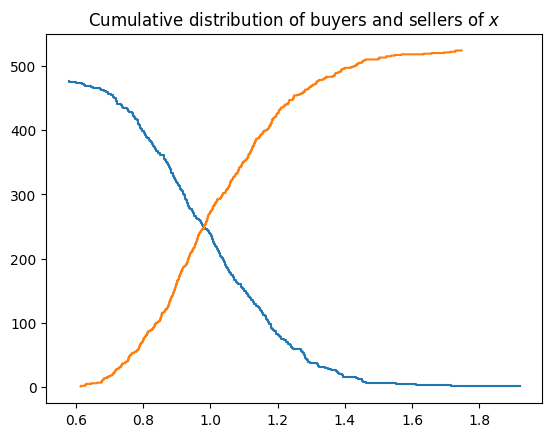

In [14]:
def create_market_participants(mean, param_1, N=1000):
    opinions = np.random.lognormal(mean=mean, sigma=param_1, size=N)
    directions = np.random.choice([-1, 1], size=N)

    buyers = opinions[np.where(directions==1)]
    sellers = opinions[np.where(directions==-1)]

    buyers = np.sort(buyers)
    sellers = np.sort(sellers)

    return buyers, sellers

N = 1000
buyers, sellers = create_market_participants(mean=0, param_1=0.2, N=N)

buyers_quantity = np.arange(len(buyers), 0, -1)
sellers_quantity = np.arange(1, len(sellers) + 1, 1)
plt.step(buyers, buyers_quantity, label='Buyers')
plt.step(sellers, sellers_quantity, label='Sellers')
plt.title("Cumulative distribution of buyers and sellers of $x$")